In [18]:
import sys

# Install only if not installed
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install pandas scikit-learn matplotlib seaborn

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("customer_behavior_analytcis.csv") 

# Display first 5 rows
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check data types
print("\nData types of each column:")
print(df.dtypes)


   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  
0              0.0     CM00000  
1              7.0     CM00001  
2              2.0     CM00002  
3             10.0     CM00003  
4              3.0     CM00004  

Missing values per column:
total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64

Data types of each column:
total_purchases     float64
avg_cart_value      float64
total_time_spent    float64
product_click       float64
discount_counts     float64
customer_id          object


In [20]:
print(df.describe())

       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       979.000000      979.000000        999.000000     979.000000   
mean         11.570991       75.457978         49.348759      28.237998   
std           7.016327       55.067835         32.730973      16.296384   
min           0.000000       10.260000          5.120000       4.000000   
25%           6.000000       33.130000         22.375000      16.000000   
50%          10.000000       49.380000         40.360000      21.000000   
75%          17.000000      121.255000         77.170000      45.000000   
max          32.000000      199.770000        119.820000      73.000000   

       discount_counts  
count       999.000000  
mean          4.313313  
std           4.532772  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           8.000000  
max          21.000000  


In [21]:
print("Unique customers:", df["customer_id"].nunique())

Unique customers: 999


In [22]:
for col in df.columns:
    if df[col].dtype == 'object':  # Checks for non-numeric columns
        print(f"Unique values in {col}:", df[col].nunique())

Unique values in customer_id: 999


In [25]:
# Fill missing values with the median of each column
# df["total_purchases"].fillna(df["total_purchases"].median(), inplace=True)
# df["avg_cart_value"].fillna(df["avg_cart_value"].median(), inplace=True)
# df["product_click"].fillna(df["product_click"].median(), inplace=True)

df.fillna({
    "total_purchases": df["total_purchases"].median(),
    "avg_cart_value": df["avg_cart_value"].median(),
    "product_click": df["product_click"].median()
}, inplace=True)

# Verify no missing values remain
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values after handling:
total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
customer_id         0
dtype: int64


In [26]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for normalization
num_cols = ["total_purchases", "avg_cart_value", "total_time_spent", "product_click", "discount_counts"]

# Initialize StandardScaler and fit-transform the data
scaler = StandardScaler()
df_scaled = df.copy()  # Make a copy of the dataset
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

# Verify the transformation
print(df_scaled.describe())


       total_purchases  avg_cart_value  total_time_spent  product_click  \
count     9.990000e+02    9.990000e+02      9.990000e+02   9.990000e+02   
mean     -1.066881e-17    2.453826e-16     -1.280257e-16   6.401286e-17   
std       1.000501e+00    1.000501e+00      1.000501e+00   1.000501e+00   
min      -1.661399e+00   -1.184361e+00     -1.351958e+00  -1.491275e+00   
25%      -7.975521e-01   -7.615311e-01     -8.245178e-01  -7.485188e-01   
50%      -2.216543e-01   -4.679858e-01     -2.747630e-01  -4.390368e-01   
75%       7.861668e-01    7.975734e-01      8.504231e-01   1.046476e+00   
max       2.945783e+00    2.285993e+00      2.154123e+00   2.779575e+00   

       discount_counts  
count     9.990000e+02  
mean      6.045659e-17  
std       1.000501e+00  
min      -9.520606e-01  
25%      -7.313345e-01  
50%      -5.106085e-01  
75%       8.137477e-01  
max       3.683186e+00  


In [28]:
from sklearn.preprocessing import StandardScaler

# Load original dataset (before transformation)
df_original = pd.read_csv("customer_behavior_analytcis.csv") 

# Select numerical columns (excluding customer_id)
numerical_features = ['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_original[numerical_features])

# Check if the values match
import numpy as np

# Check if mean is approximately 0
print(np.allclose(df_scaled[num_cols].mean(), 0, atol=1e-7))  # True

# Check if std is approximately 1
print(np.allclose(df_scaled[num_cols].std(), 1, atol=1e-3))  # True

True
True


In [29]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_features = ['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = df.copy()  # Create a copy of the original dataset to avoid overwriting
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

# Verify the transformation
print(df_scaled[numerical_features].describe())  # It should show mean ~0 and std ~1

       total_purchases  avg_cart_value  total_time_spent  product_click  \
count     9.990000e+02    9.990000e+02      9.990000e+02   9.990000e+02   
mean     -1.066881e-17    2.453826e-16     -1.280257e-16   6.401286e-17   
std       1.000501e+00    1.000501e+00      1.000501e+00   1.000501e+00   
min      -1.661399e+00   -1.184361e+00     -1.351958e+00  -1.491275e+00   
25%      -7.975521e-01   -7.615311e-01     -8.245178e-01  -7.485188e-01   
50%      -2.216543e-01   -4.679858e-01     -2.747630e-01  -4.390368e-01   
75%       7.861668e-01    7.975734e-01      8.504231e-01   1.046476e+00   
max       2.945783e+00    2.285993e+00      2.154123e+00   2.779575e+00   

       discount_counts  
count     9.990000e+02  
mean      6.045659e-17  
std       1.000501e+00  
min      -9.520606e-01  
25%      -7.313345e-01  
50%      -5.106085e-01  
75%       8.137477e-01  
max       3.683186e+00  


In [30]:
# Check if mean ~ 0 and std ~ 1
print(df_scaled[numerical_features].mean(axis=0))  # Should be close to 0
print(df_scaled[numerical_features].std(axis=0))   # Should be close to 1

total_purchases    -1.066881e-17
avg_cart_value      2.453826e-16
total_time_spent   -1.280257e-16
product_click       6.401286e-17
discount_counts     6.045659e-17
dtype: float64
total_purchases     1.000501
avg_cart_value      1.000501
total_time_spent    1.000501
product_click       1.000501
discount_counts     1.000501
dtype: float64


Cluster Centers:
[[-0.19708386  1.27731529 -0.27133562 -0.50556619 -0.52382561]
 [-0.95236802 -0.47432064  1.24907822  1.31699351 -0.72535098]
 [ 1.14718376 -0.80825482 -0.97317679 -0.80595416  1.24857141]]


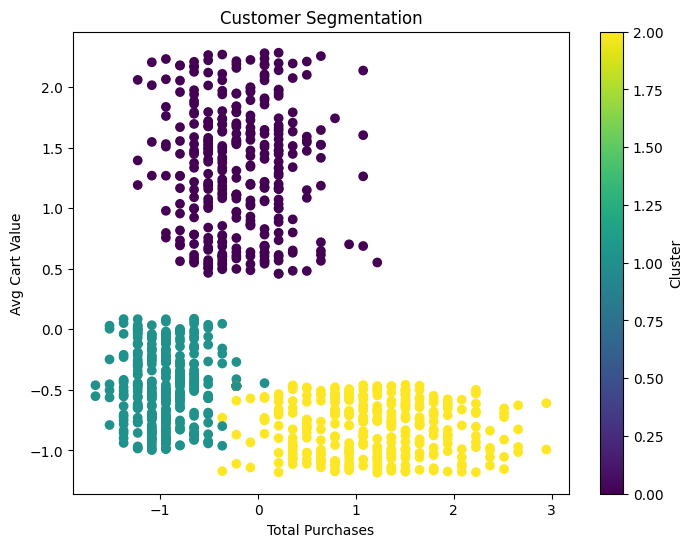

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the number of clusters (3 segments)
n_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled[numerical_features])

# Check the cluster centers and the distribution of customers in each cluster
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Visualize the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['total_purchases'], df_scaled['avg_cart_value'], c=df_scaled['cluster'], cmap='viridis')
plt.title("Customer Segmentation")
plt.xlabel("Total Purchases")
plt.ylabel("Avg Cart Value")
plt.colorbar(label='Cluster')
plt.show()


In [32]:
# Print the cluster centers for interpretation
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_features)
print(cluster_centers)

# Check the cluster distribution
cluster_counts = df_scaled['cluster'].value_counts()
print(cluster_counts)

   total_purchases  avg_cart_value  total_time_spent  product_click  \
0        -0.197084        1.277315         -0.271336      -0.505566   
1        -0.952368       -0.474321          1.249078       1.316994   
2         1.147184       -0.808255         -0.973177      -0.805954   

   discount_counts  
0        -0.523826  
1        -0.725351  
2         1.248571  
cluster
0    334
2    333
1    332
Name: count, dtype: int64


In [33]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
sil_score = silhouette_score(df_scaled[numerical_features], df_scaled['cluster'])
print(f"Silhouette Score: {sil_score}")

# Calculate inertia (sum of squared distances of samples to their closest cluster center)
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Silhouette Score: 0.6125304109499938
Inertia: 884.579590671945


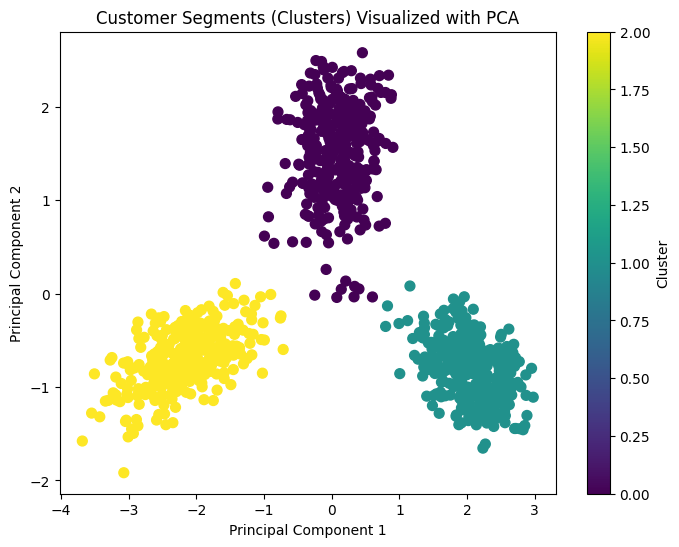

In [34]:
from sklearn.decomposition import PCA

# Perform PCA to reduce the data to 2D
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled[numerical_features])

# Create a new DataFrame with the PCA results and cluster labels
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = df_scaled['cluster']

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis', s=50)
plt.title("Customer Segments (Clusters) Visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [35]:
# Group the data by clusters and calculate the mean of each feature
cluster_means = df_scaled.groupby('cluster')[numerical_features].mean()
print(cluster_means)

         total_purchases  avg_cart_value  total_time_spent  product_click  \
cluster                                                                     
0              -0.197084        1.277315         -0.271336      -0.505566   
1              -0.952368       -0.474321          1.249078       1.316994   
2               1.147184       -0.808255         -0.973177      -0.805954   

         discount_counts  
cluster                   
0              -0.523826  
1              -0.725351  
2               1.248571  
